In [7]:
# Import Required Library
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk

In [19]:
Buzzfeed = pd.read_csv("data/BuzzFeed_data.csv")

In [20]:
real_order=Buzzfeed[Buzzfeed['news_type']=='Real']['source'].value_counts().sort_values(ascending=False).index

In [15]:
real_order

Index(['http://politi.co', 'http://cnn.it', 'http://abcn.ws',
       'http://rightwingnews.com', 'http://eaglerising.com',
       'http://www.addictinginfo.org', 'http://www.ifyouonlynews.com',
       'http://addictinginfo.org', 'http://winningdemocrats.com',
       'http://www.opposingviews.com', 'http://conservativebyte.com',
       'http://freedomdaily.com', 'https://www.washingtonpost.com',
       'http://occupydemocrats.com'],
      dtype='object')

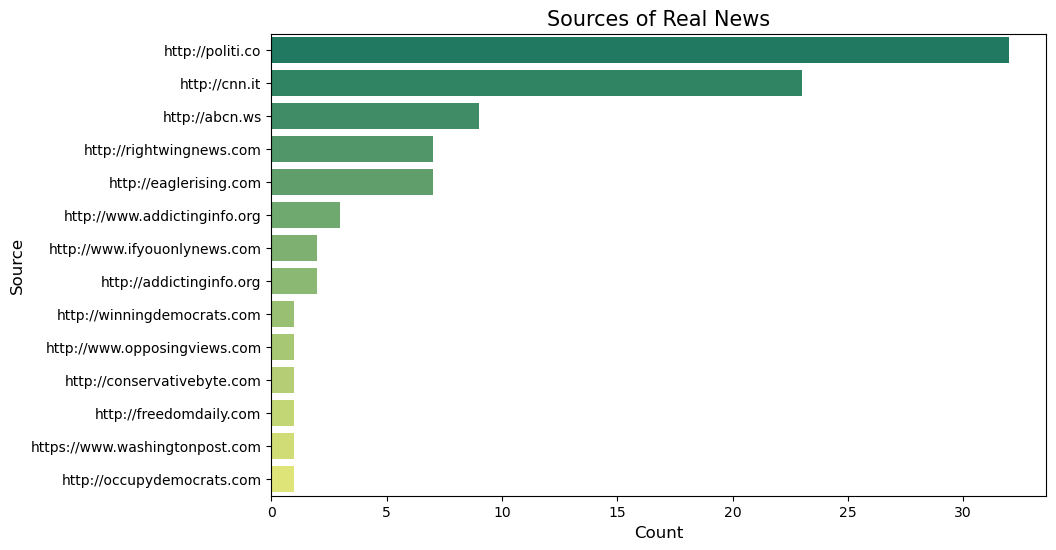

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(y='source', data=Buzzfeed[Buzzfeed['news_type']=='Real'],order=real_order,palette='summer')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Sources of Real News',fontsize=15)
plt.show()

In [21]:
fake_order=Buzzfeed[Buzzfeed['news_type']=='Fake']['source'].value_counts().sort_values(ascending=False).index

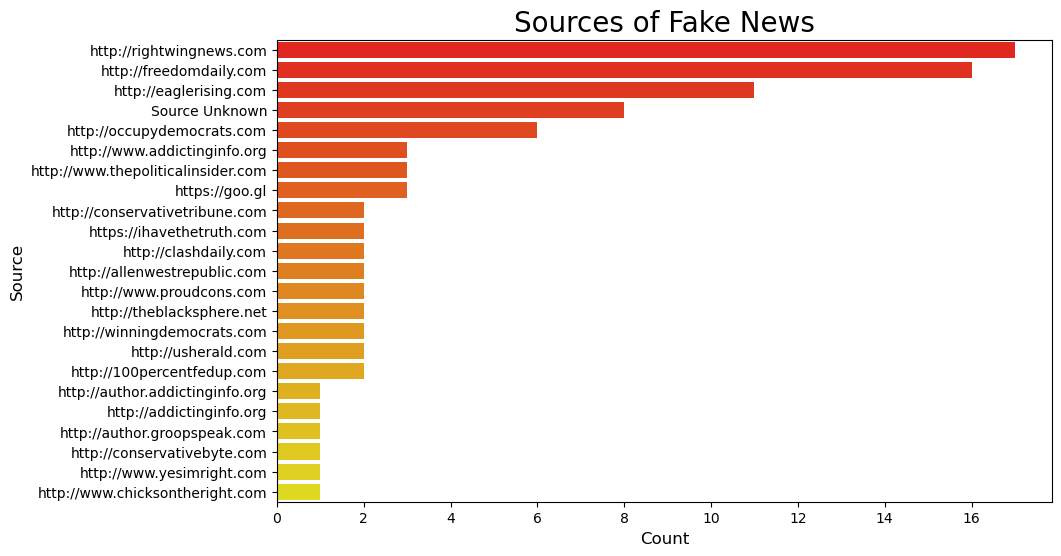

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(y='source',data=Buzzfeed[Buzzfeed['news_type']=='Fake'],order=fake_order,palette='autumn')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Sources of Fake News',fontsize=20)
plt.show()

In [23]:
new=[]
for x in Buzzfeed[Buzzfeed['news_type']=='Fake']['source'].unique():
    if x in Buzzfeed[Buzzfeed['news_type']=='Real']['source'].unique():
        new.append(x)
print(new)

Buzzfeed_copy = Buzzfeed.copy()

Buzzfeed_copy['common']=Buzzfeed_copy['source'].apply(lambda x: x if x in new else 0)

Buzzfeed_plot = Buzzfeed_copy[Buzzfeed_copy['common']!=0]

['http://www.addictinginfo.org', 'http://eaglerising.com', 'http://conservativebyte.com', 'http://winningdemocrats.com', 'http://freedomdaily.com', 'http://occupydemocrats.com', 'http://rightwingnews.com', 'http://addictinginfo.org']


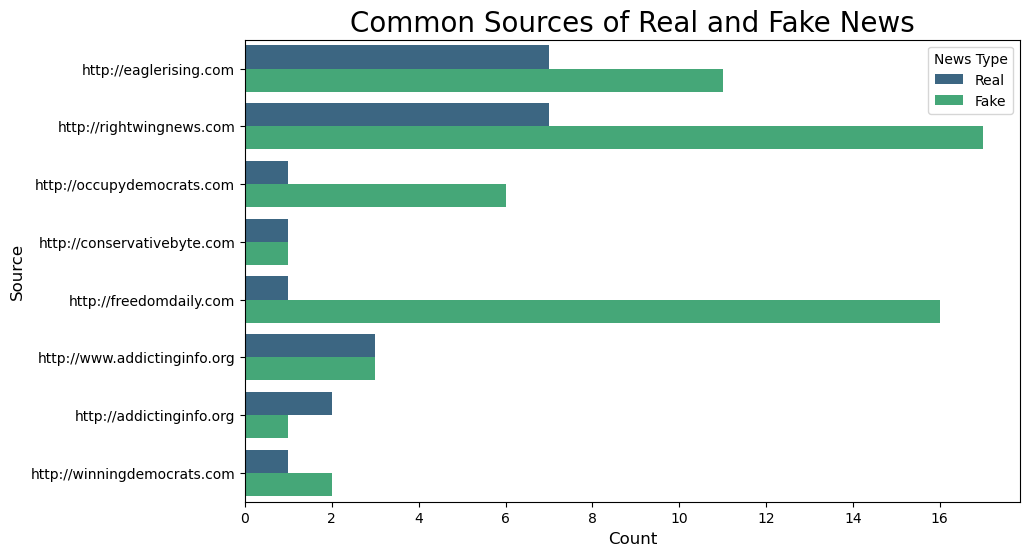

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(y='common',data=Buzzfeed_plot,hue='news_type',palette='viridis')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.legend(loc='best', title='News Type',fontsize=10)
plt.title('Common Sources of Real and Fake News',fontsize=20)
plt.show()

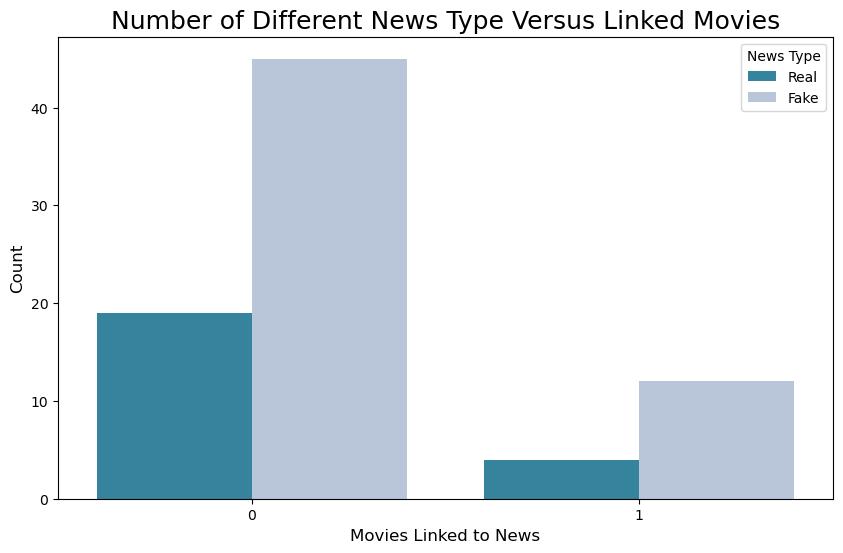

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='contain_movies', data=Buzzfeed_plot, hue='news_type', palette='PuBuGn_r')
plt.xlabel('Movies Linked to News',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(loc='best', title='News Type',fontsize=10)
plt.title('Number of Different News Type Versus Linked Movies',fontsize=18)
plt.show()

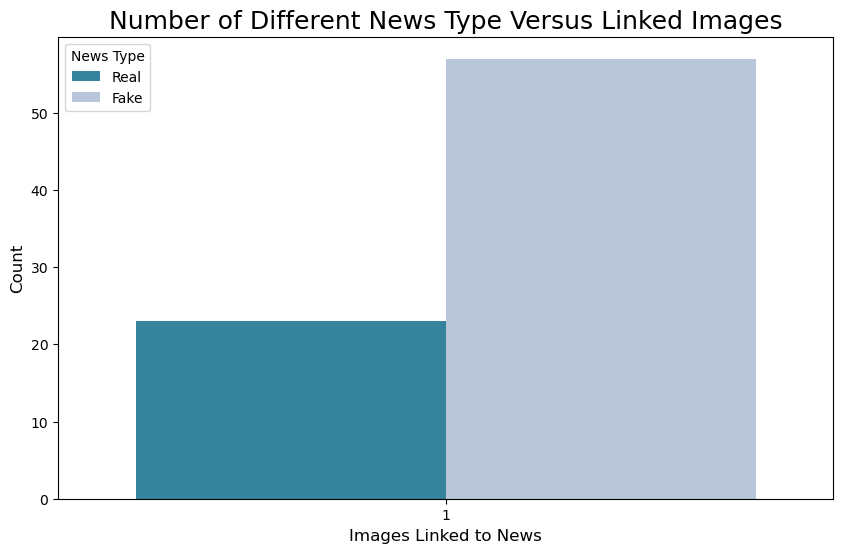

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='contain_images', data=Buzzfeed_plot, hue='news_type', palette='PuBuGn_r')
plt.xlabel('Images Linked to News',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(loc='upper left', title='News Type',fontsize=10)
plt.title('Number of Different News Type Versus Linked Images',fontsize=18)
plt.show()